In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Competition for One resource

In [4]:


e1 = 0.1
a1 = 1
d1 = 0.3
e2 = 0.1
a2 = .5
d2 = 0.1

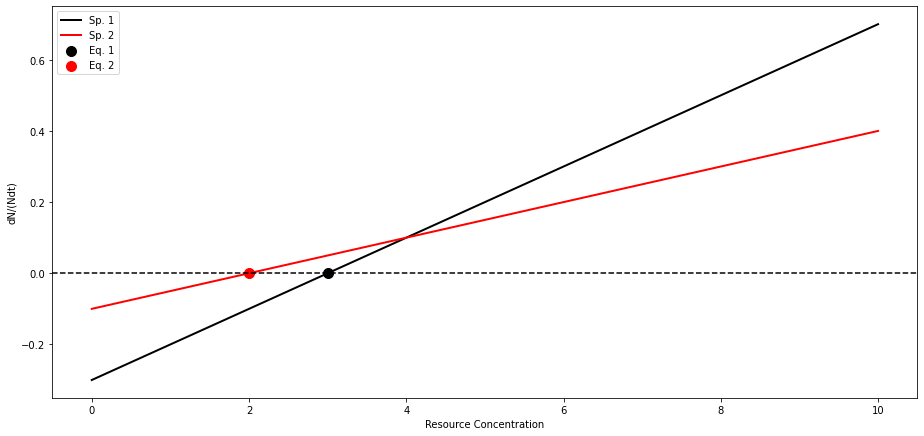

In [15]:
x = np.linspace(0, 10, 500)

y1 = e1*a1*x - d1
y2 = e2*a2*x - d2

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
ax.plot(x, y1, c="black", lw=2, label="Sp. 1")
ax.plot(x, y2, c="red", lw=2,  label="Sp. 2")
ax.axhline(y=0, linestyle='--', color='black')
ax.set_xlabel("Resource Concentration")
ax.set_ylabel("dN/(Ndt)")

x1 = d1/(e1*a1);
x2 = d2/(e2*a2)

ax.scatter(x1, 0, s=100, color="black", label="Eq. 1")
ax.scatter(x2, 0, s=100, color="red", label="Eq. 2")

ax.legend()




In [30]:

def model1(x, t):
    N1, N2, R = x

    dN1 = N1*(e1*a1*R - d1)
    dN2 = N2*(e2*a2*R - d2)
    dR  = r*(S-R) - a1*N1*R - a2*N2*R

    return [dN1, dN2, dR]


Text(0, 0.5, 'Grams')

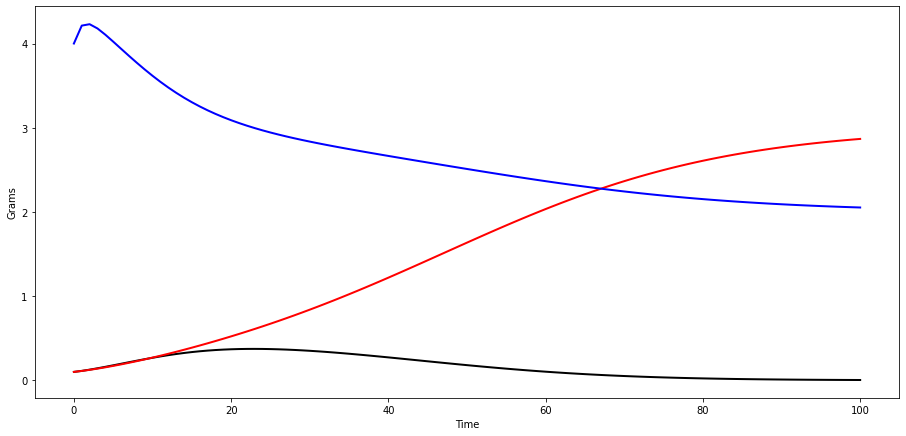

In [38]:
from scipy.integrate import odeint

t_span = np.arange(0,100+1)
y0     = [.1, .1, 4]

p =(0.1, 1, 0.3, 0.1, 0.5, 0.1, 5, 1)
e1, a1, d1, e2, a2, d2, S, r, = [0.1, 1, 0.3, 0.1, 0.5, 0.1, 5, 1]
y = odeint(model1, y0, t_span)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
ax.plot(t_span, y[:, 0], lw=2, c="black", label="N1")
ax.plot(t_span, y[:, 1], lw=2, c="red", label="N2")
ax.plot(t_span, y[:, 2], lw=2, c="blue", label="R")
ax.set_xlabel("Time")
ax.set_ylabel("Grams")

# Competition for Substitutable resources

In [39]:
def model2(x, t):
    N1, N2, R1, R2 = x
    dN1 = N1 * ( e11*a11*R1 + e12*a12*R2  - d1 )
    dN2 = N2 * ( e21*a21*R1 + e22*a22*R2  - d2 )
    dR1 = r1 * (S1 - R1) - (a11*N1 + a21*N2)*R1
    dR2 = r2 * (S2 - R2) - (a12*N1 + a22*N2)*R2

    return [dN1, dN2, dR1, dR2]


In [41]:
# the environment supplies slightly more of resources
r1 = 1
r2=1
S1=1.8
S2=1.2

# sp 1 grows more with each unit of R1
# sp 2 grows more with each unit of R2
e11=.1
e12=.1
e21=.1
e22=.1

# sp 1 consumes more R1 than R2 and more than sp 2
# sp 2 consumes more R2 than R1 and more than sp 1
a11=2
a12=1
a21=1
a22=2

# both spp die at the same rate
d1=.1
d2=.1

In [44]:
t_span = np.linspace(0, 20, 100)
y0 = [1, 1, 1.8, 1.2]
y1 = odeint(model2, y0, t_span)

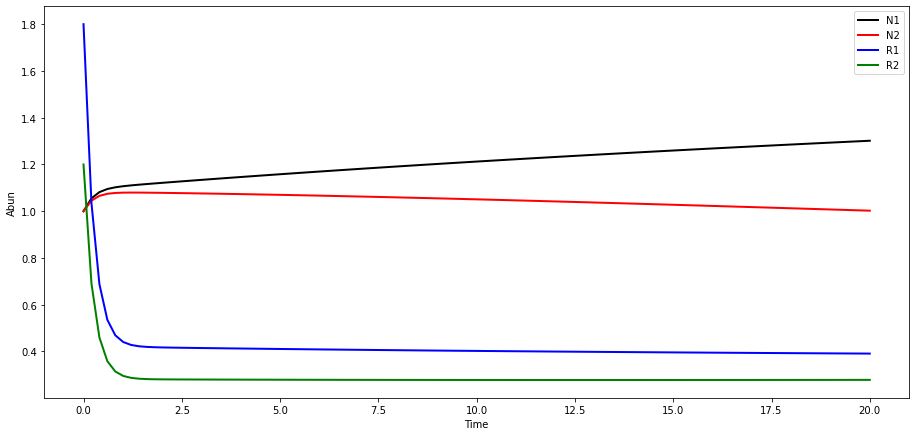

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
ax.plot(t_span, y1[:, 0], lw=2, c="black", label="N1")
ax.plot(t_span, y1[:, 1], lw=2, c="red", label="N2")
ax.plot(t_span, y1[:, 2], lw=2, c="blue", label="R1")
ax.plot(t_span, y1[:, 3], lw=2, c="green", label="R2")

ax.set_xlabel("Time")
ax.set_ylabel("Abun")

ax.legend()

# Tilman’s resource ratio with essential resources

In [72]:


def model3(x, t):
    N1, N2, R1, R2 = x

    dN1 = r1 * N1 * ( np.minimum( c11*R1/(k11 + R1), c21*R2/(k21 + R2)  ) - m1 )
    dN2 = r2 * N2 * ( np.minimum( c12*R1/(k12 + R1), c22*R2/(k22 + R2)  ) - m2 )
    dR1 = a1 * (S1 - R1) - r1 * N1 * ( np.minimum( c11*R1/(k11 + R1), c21*R2/(k21 + R2) ) ) / e11 -  r2 * N2 * ( np.minimum(  c12*R1/(k12 + R1), c22*R2/(k22 + R2) ))/e12
    dR2 = a2 * (S2 - R2) - r1 * N1 * ( np.minimum( c11*R1/(k11 + R1), c21*R2/(k21 + R2) ) ) / e21 -  r2 * N2 * ( np.minimum(  c12*R1/(k12 + R1), c22*R2/(k22 + R2) ))/e22

    return [dN1, dN2, dR1, dR2]

a1  = 1;   a2  = 1;  S1  = 10;  S2  = 10
r1  = 1;   r2  = 1;  m1  = .1;  m2  = .1
c11 = 1;   c21 = 1;  c12 = 1;   c22 = 1
k11 = .1;  k21 = 1;  k12 = 1;   k22 = .1
e11 = .1;  e21 =.1;  e12 = .1;  e22 = .1



Text(0, 0.5, '$r_{i}*c_{i}*R_{j} /( k_{ji}i + R_{j}) - m_{i}$')

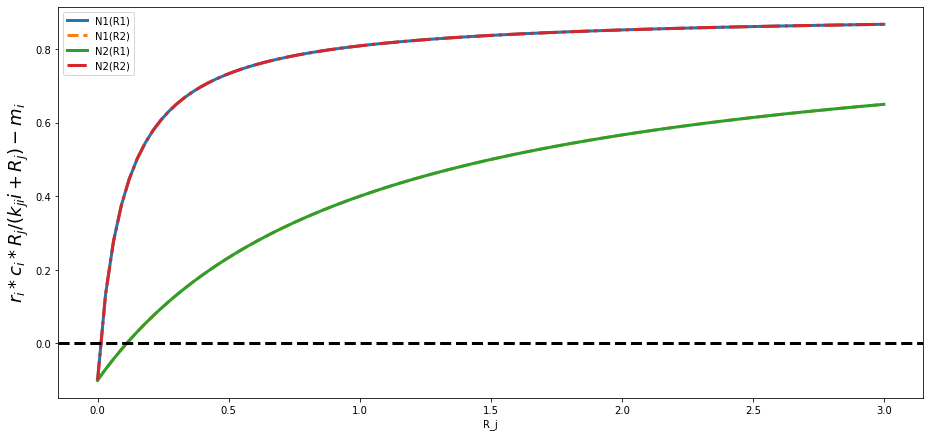

In [73]:
x = np.linspace(0,3, 100)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))

ax.plot(x, r1*c11*x/(k11 + x)-m1, lw=3)
ax.plot(x, r1*c21*x/(k21 + x)-m1, linestyle='--', lw=3)
ax.plot(x, r2*c12*x/(k12 + x)-m2, lw=3)
ax.plot(x, r2*c22*x/(k22 + x)-m2, lw=3, linestyle='-.')

ax.axhline(y=0, linestyle='--', lw=3, color='k')
ax.legend(['N1(R1)', 'N1(R2)', 'N2(R1)', 'N2(R2)'])

ax.set_xlabel("R_j")
ax.set_ylabel(r"$r_{i}*c_{i}*R_{j} /( k_{ji}i + R_{j}) - m_{i}$", fontsize=18)

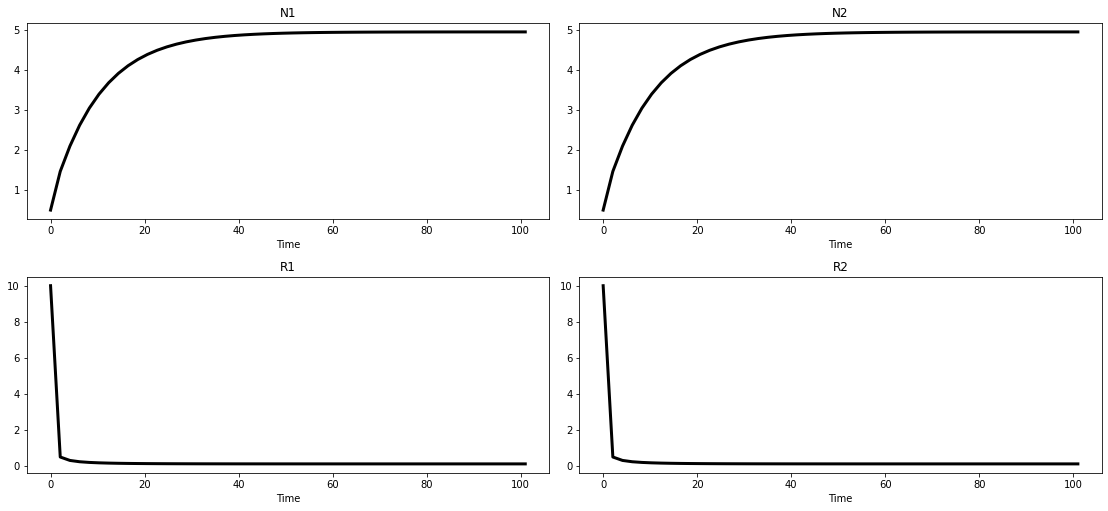

In [81]:
t = np.linspace(0,100+1)

y0 = [ .5, .5, 10, 10]
y  = odeint(model3, y0, t)

import seaborn as sns

titles =["N1", "N2", "R1", "R2"]
fig, ax = plt.subplots(2, 2, figsize=(15.5, 7.2))

for idx, axi in enumerate(ax.flatten()):

    axi.plot(t, y[:, idx], lw=3, color='black')
    axi.set_xlabel("Time")
    axi.set_title(titles[idx])

plt.tight_layout()

# Consumer-resource mutualism

Text(0, 0.5, 'Dispersal rate of a seed')

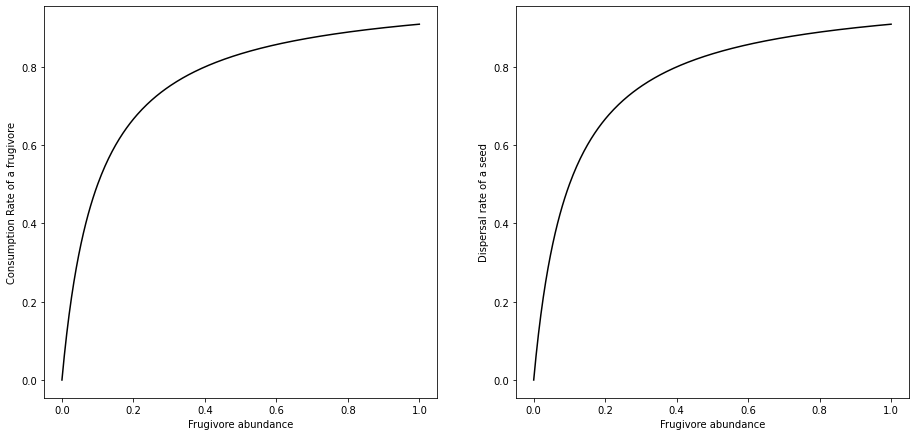

In [85]:
x = np.linspace(0, 1, 300)

fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))


ax[0].plot(x, 10*x/(1+10*x), c="k")
ax[1].plot(x, 10*x/(1+10*x), c="k")

ax[0].set_xlabel("Frugivore abundance")
ax[1].set_xlabel("Frugivore abundance")

ax[0].set_ylabel("Consumption Rate of a frugivore")
ax[1].set_ylabel("Dispersal rate of a seed")

In [86]:
def model4(x, t):
    M1, M2 =x
    dM1 = M1 * (r1 - d1*M1 + a12*M2/(h2 + M2) - B1*M2/(e1+M1) )
    dM2 = M2 * (r2 - d2*M2 + a21*M1/(h1 + M1) - B2*M1/(e2+M2) )

    return [dM1, dM2]

r1 = 1; r2 = 1; d1=0.01; d2=0.01
a12 = 0.4; a21 = 0.25; B1 = 0.3; B2 = 0
h1=0.3; h2=0.3; e1=0.3; e2=0.3

Text(0, 0.5, 'N')

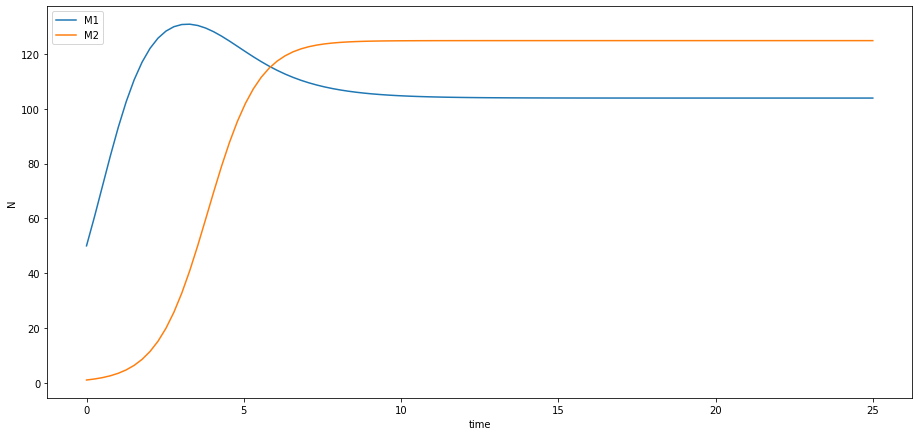

In [92]:
t  = np.linspace(0,25, 100)
y0 = [50, 1]

y = odeint(model4, y0, t)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))

ax.plot(t, y)
ax.legend(["M1", "M2"])
ax.set_xlabel("time")
ax.set_ylabel("N")

# Plant-soil feedbacks

In [94]:
def model5(x, t):
    Na, Nb, SA = x
    dNa = ra * Na * (1+alphaA*SA + betaA*(1-SA) - (Na + cB*Nb)/Ka)
    dNb = rb * Nb * (1+alphaB*SA + betaB*(1-SA) - (cA*Na + Nb)/Kb)
    dSA = SA*(1-SA) * ( Na/(Na+Nb) - nu*Nb/(Na+Nb) )

    return [dNa, dNb, dSA]


Text(0, 0.5, 'N')

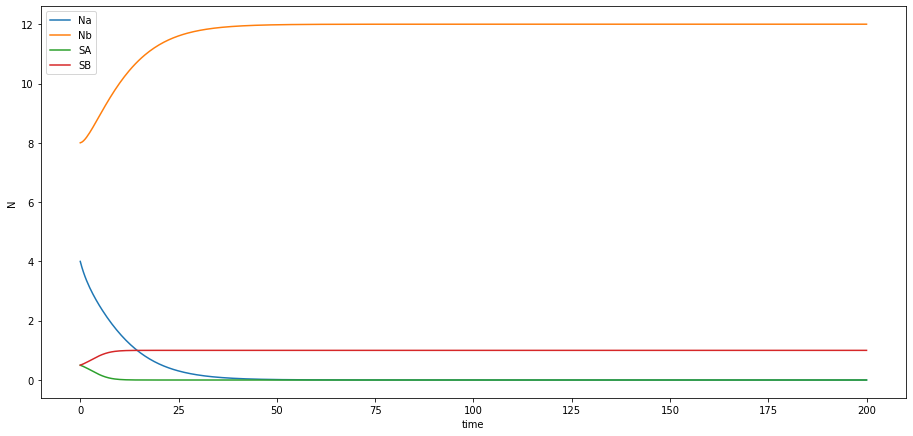

In [99]:

ra=0.7; rb=0.5; Ka = 10; Kb=12; cA=.98; cB=.98
alphaA=0; alphaB=0; betaA=0; betaB=0; nu=0.8


t  = np.linspace(0, 200, 500)
y0 = [4, 8, 0.5]

y = odeint(model5, y0, t)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))

ax.plot(t, y)
ax.plot(t, 1-y[:,-1])

ax.legend(["Na", "Nb", "SA", "SB"])
ax.set_xlabel("time")
ax.set_ylabel("N")

Text(0, 0.5, 'N')

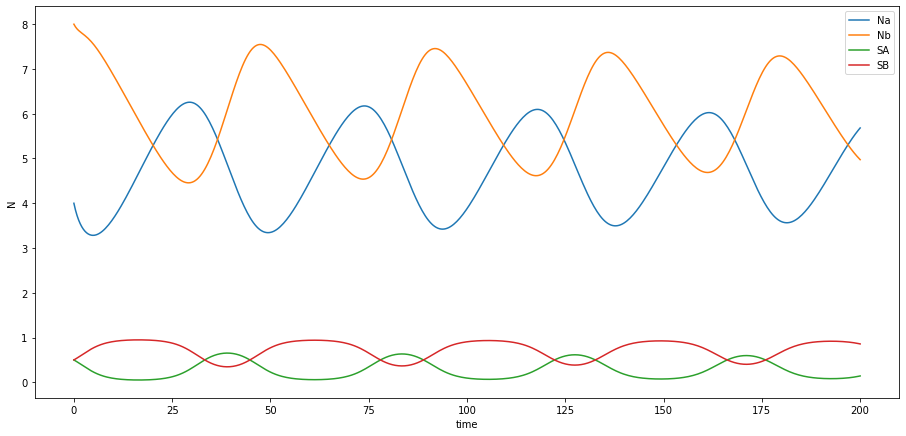

In [100]:
ra=0.7; rb=0.5; Ka = 10; Kb=12; cA=.98; cB=.98; alphaA=-0.03; alphaB=0.1; betaA=0.1; betaB=-0.2; nu=0.8

t  = np.linspace(0, 200, 500)
y0 = [4, 8, 0.5]

y = odeint(model5, y0, t)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))

ax.plot(t, y)
ax.plot(t, 1-y[:,-1])

ax.legend(["Na", "Nb", "SA", "SB"])
ax.set_xlabel("time")
ax.set_ylabel("N")